In [8]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as py
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


# Loading the Satellite Imagery from the Repository
1. Unzip the files to load them into memory (too large for a github repository).

In [16]:
f = Dataset(r"Training_Dataset_Final.nc")
training_data = f['Reflectance'][:].data
X_train = training_data[0:1000]
X_test = training_data[1000:]

# Dataset
1. Consists of Cellular Clouds with Open-celled domains, closed-celled domains, disorganised cellular domains, and "stratus like clouds"
2. These are labelled in the Dataset (see dataset attributes).

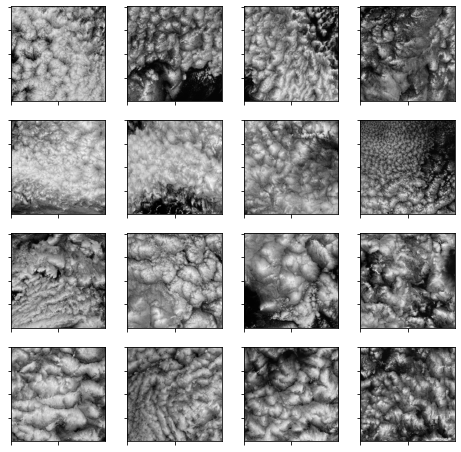

In [44]:
fig, ax = py.subplots(4,4, figsize = (8,8))
ax = ax.ravel()
for i, axes in enumerate(ax):
    axes.imshow(X_train[i], cmap ='gray')
    axes.set_yticklabels([])
    axes.set_xticklabels([])

## Creating a Model
1. Input shape is one-eighth of the original data

In [13]:
input_img = Input(shape=(25, 25, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(64, (9, 9), activation='relu', padding='same')(input_img)
x = UpSampling2D((2, 2))(x)
x = Conv2D(12, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(6, (2, 2), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (2, 2), activation='relu', padding='same')(x)
decoded = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [14]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 25, 25, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)        5248      
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 12)        19212     
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 100, 100, 12)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 6)       294       
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 200, 200, 6)       0   

In [ ]:

sub_sample_train = X_train[:,::8,::8,np.newaxis]
sub_sample_test = X_test[:,::8,::8,np.newaxis]
autoencoder.fit(sub_sample_train, X_train[:,:,:,np.newaxis],
                epochs=10,
                batch_size=20,
                shuffle=True,
                validation_data=(sub_sample_test, X_test[:,:,:,np.newaxis]))#,

Train on 1000 samples, validate on 421 samples
Epoch 1/10
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 2/10
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 3/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 4/10
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 5/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0071 - val_loss: 0.0064
Epoch 6/10
1000/1000 [==============================] - 70s 70ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 7/10
1000/1000 [==============================] - 72s 72ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 8/10
  80/1000 [=>............................] - ETA: 1:00 - loss: 0.0061

In [ ]:
img = autoencoder.predict(X_test[:,::8,::8,np.newaxis])

0.8661499

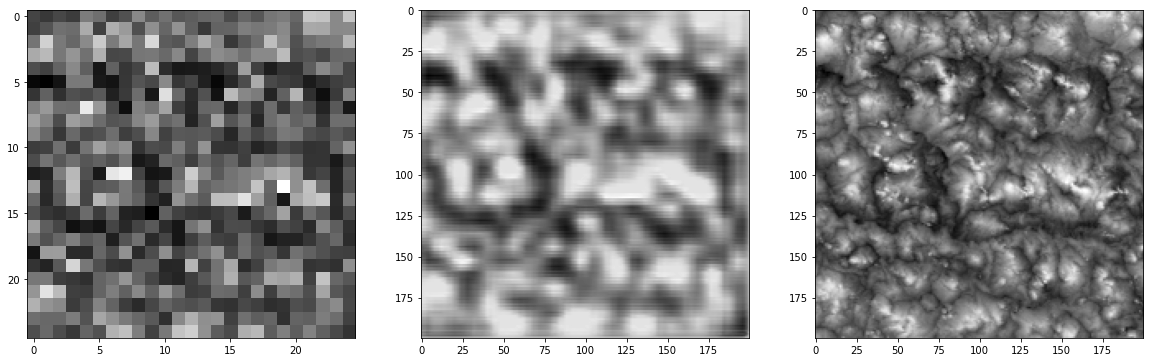

In [65]:
idx_of_interest = 3
fig, ax = py.subplots(1,3, figsize = (20,20))
ax[0].imshow(X_test[:,::8,::8,np.newaxis][idx_of_interest,:,:,0], cmap ='gray')
ax[1].imshow(img[idx_of_interest,:,:,0], cmap='gray')
ax[2].imshow(X_test[idx_of_interest],cmap='gray')
